# **Physics and Engineering Solutions**

### **1 - Fluid Dynamics**

The flow velocity $u$ of a fluid with viscosity coefficient $\mu$ travelling through a pipe of circular cross section with radius $a$, under a constant pressure gradient $P$, is given by 

$$u(r) = \frac{P}{4\mu}(a^2 - r^2)$$

where $r$ is the distance from the centreline.

Define a function which will return the flow rate through a cross section, with inputs $r$, $P$, $\mu$, and $a$. 

**HINTS:**

1.   The flow rate is given by $$2\pi\int_0^a u(r) r \text{d}r$$.
2.   After importing scipy, by running the below cell, you can calculate integrals over one variable using the in-built function ```quad``` as follows. Given a function of four variables (which you will have to define), say $u(r,P,\mu,a)$, ```integrate.quad(u(r,3,1,4))``` will return the value of the integral of $u$ over $r$ from a to b, with $P=3$, $\mu=1$, $a=4$.
3.   Don't forget the $r$ factor!
4.   Define ```flow_rate(P,mu,a)```, which returns the integral of ```u(r)``` over $r$, with the correct other parameters. You may need to define a local function, inside of the first one.
5.   ```integrate.quad``` returns a tuple with two elements. The first element is the value of the integral, and the second is an uncertainty estimate. Select only the first entry to print.


In [1]:
import scipy
import scipy.integrate as integrate
import numpy as np

In [2]:
def flow_rate(P,mu,a):
  def u_flow(r):
    return P * r * (a**2 - r**2) / (4 * mu)
  return 2 * np.pi * integrate.quad(u_flow,0,a)[0]

print(flow_rate(3,4,5))

184.07769454627694


Use a nested for loop to calculate the flow rate when both $\mu$ and $a$ take values between 1 and 10 inclusive, with $P=7.5$. Add this value to a list called ```flow rates```.

Also, print how many rates out of 100 are less than 1, and the average flow rate.



In [3]:
flow_rates = []
counter = 0

for i in range(1,11):
  for j in range(1,11):
    flow_rates.append(flow_rate(7.5,i,j))
    if flow_rate(7.5,i,j) < 1:
      counter += 1

print(counter, np.mean(flow_rates))

8 2185.357217871701


### **2 - Hydrogen Emission Lines**

For a given $n=1,2,3,...$ and $m>n$, the wavelengths of radiation from Hydrogen atoms due to electron energy level transitions is given by the Rydberg formula

$$\frac{1}{\lambda} = R\left( \frac{1}{n^2} - \frac{1}{m^2}\right)$$

where $R \approx 1.097 \times 10^{-2}$ and $\lambda$ is in nm.

*  Write some code, using for loops, which prints the value of $n$, followed by the corresponding first 5 emission wavelengths, for $n=1,2,3$. Print each on a new line.
*  The next cell defines three lists - one for each $n$ value. Incorporate into the code some if statements which append the wavelength to the correct list, depending on the $n$ value.

In [4]:
R = 1.097e-2

one = []
two = []
three = []

In [5]:
for n in [1,2,3]:
  print("Series for n = ", n, ":", sep="") 
  for k in [1,2,3,4,5]:
    m = n+k
    one_over_lambda = R * (1 / n**2 - 1 / m**2)
    if n == 1:
      one.append(1/one_over_lambda)
    elif n == 2:
      two.append(1/one_over_lambda)
    else: 
      three.append(1/one_over_lambda)
    print(1/one_over_lambda,"nm")

Series for n = 1:
121.5436037678517 nm
102.55241567912488 nm
97.23488301428137 nm
94.95594044363415 nm
93.76220862091418 nm
Series for n = 2:
656.3354603463993 nm
486.1744150714068 nm
434.084299170899 nm
410.2096627164995 nm
397.04243897498225 nm
Series for n = 3:
1875.2441724182836 nm
1281.9051959890612 nm
1093.8924339106654 nm
1005.013673655424 nm
954.6697605038536 nm


Run the final cell to see the data visualised. It should look familiar to you if you have computed the wavelengths correctly!

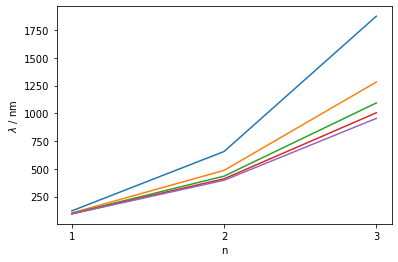

In [6]:
import matplotlib.pyplot as plt

plt.xlabel("n")
plt.ylabel("$\lambda$ / nm")
plt.plot([1,2,3],[one,two,three])
plt.xticks((1,2,3))
plt.show()